# How to Fit a Normal Distribution accounting for data errors and instrinsic dispersion? 
## Test example

We are going to use scipy to create a data (200 points) having:

* a mean of 3
* an intrinsic disperison of 0.5
* each point has a random error between 0.2 and 0.7


#### Basic ipython notebook import 

In [1]:
# plot within the notebook
%matplotlib inline
import warnings
# No annoying warnings
warnings.filterwarnings('ignore')
# Because we always need that
import numpy as np
import matplotlib.pyplot as mpl

In [11]:
errors= np.random.rand(200)/0.5 +0.2
data = np.random.normal(loc=3, scale=0.5, size=200) * (1 + np.random.normal(loc=0, scale=errors))


## Check the Input data

(array([ 13.,  23.,  15.,  24.,  16.,  20.,  19.,  23.,  29.,  18.]),
 array([ 0.20595285,  0.40479052,  0.60362818,  0.80246585,  1.00130352,
         1.20014118,  1.39897885,  1.59781652,  1.79665419,  1.99549185,
         2.19432952]),
 <a list of 1 Patch objects>)

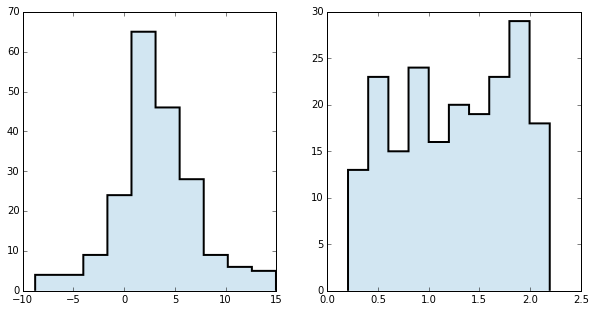

In [12]:
fig = mpl.figure(figsize=[10,5])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
prop = dict( histtype="step", fill=True, fc=mpl.cm.Blues(0.5,0.3), ec="k", lw=2)
ax1.hist(data, **prop)
ax2.hist(errors,**prop)

## What would mean and std told you ?

In [13]:
print "mean: ", np.mean(data)
print "std: ", np.std(data)
print " => error on the mean: ",np.std(data)/np.sqrt(len(data))
print " => error on the std: ",np.std(data)/np.sqrt(2*len(data))

mean:  3.13926557093
std:  3.96584717707
 => error on the mean:  0.280427743206
 => error on the std:  0.198292358854


# Fit this with a Likelihood

In [14]:
import modefit
reload(modefit) ; reload(modefit.fitter) ; reload(modefit.fitter.unimodal)

<module 'modefit.fitter.unimodal' from '/Users/mrigault/Libraries/modefit/fitter/unimodal.pyc'>

In [15]:
normfit = modefit.normalfit(data,errors)

In [18]:
normfit.fit(mean_guess=2, mean_boundaries=[-10,10], sigma_guess=3, sigma_boundaries=[0,10])

STARTS MINUIT FIT


FCN = 1105.94685924 
 TOTAL NCALL = 37 
 NCALLS = 37 
 
 
 EDM = 5.20761912231e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,mean,3.13981,0.262285,0,0,-10.0,10.0,
2,sigma,3.46266,0.211506,0,0,0.0,10.0,
